In [27]:
import numpy as np
import pandas as pd
import scipy
import glob

path = "C:/Users/markh/Desktop/Università/Healthcare Data/SL4HD/Train2/"
all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, names = ["x","y","z","t"])
    li.append(df)

In [18]:
def extrapolen(ls):

    # Create columns of the output dataset
    columns = ['len']
    df = pd.DataFrame(columns=columns)

    # Loop over all the .csv tables
    for i in np.arange(len(ls)): #da cambiare con len(ls)
        t = np.asarray(ls[i].t)
        row = len(t)
        df.loc[i] = row
    return df


df = extrapolen(li)
df

,len
0,1336
1,1674
2,1518
3,1457
4,1838
...,...
463,1838
464,1194
465,1160
466,1805


<Axes: >

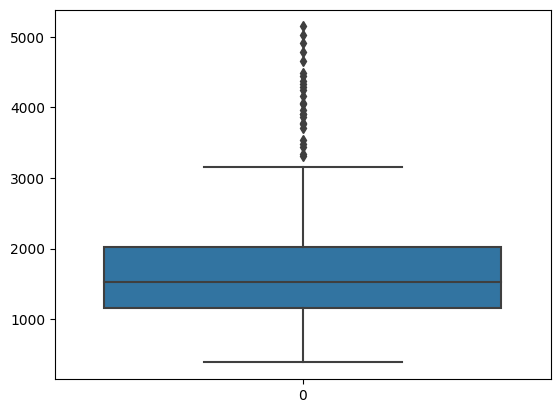

In [19]:
import seaborn as sns
sns.boxplot(df.len)

(array([ 35., 148., 122.,  78.,  52.,   7.,   6.,   9.,   7.,   4.]),
 array([ 388. ,  863.8, 1339.6, 1815.4, 2291.2, 2767. , 3242.8, 3718.6,
        4194.4, 4670.2, 5146. ]),
 <BarContainer object of 10 artists>)

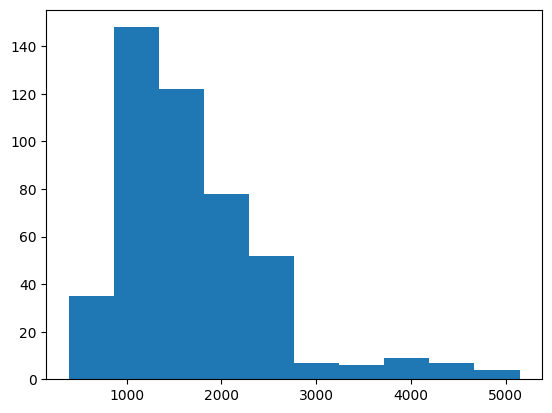

In [20]:
import matplotlib.pyplot as plt
plt.hist(df.len)

In [21]:
df2 = pd.read_csv('classes.csv')
df2

df = pd.concat([df,df2],axis=1)
df

,len,code,class
0,1336,MR,1
1,1674,MR,1
2,1518,MR,1
3,1457,MR,1
4,1838,MR,1
...,...,...,...
463,1838,FB,2
464,1194,FF,2
465,1160,FF,2
466,1805,FS,2


<Axes: xlabel='class', ylabel='len'>

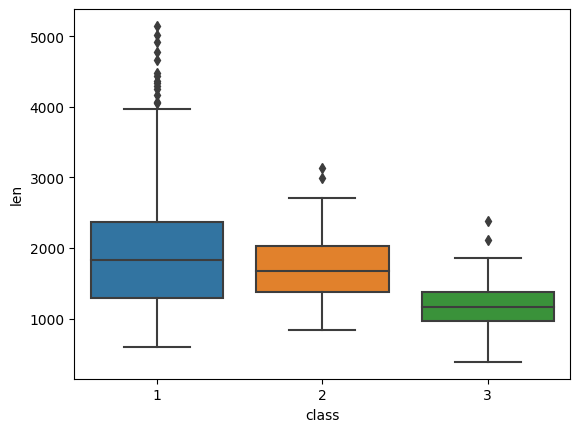

In [25]:
sns.boxplot(x='class',y='len', data=df)

In [41]:
from scipy.fft import fft, ifft

# Class 1
x1 = np.asarray(li[0].x)
t1 = np.asarray(li[0].t)
sample_t = (t1[-1]-t1[0])/len(t1)
fx1 = fft(x1)
fx1

sample_t
Fs = 1/sample_t
freq = np.linspace(0, Fs/2, int(len(t)/2)+1)

0.004886806596701648